In [1]:
using_colab = 'google.colab' in str(get_ipython())
if using_colab:
  !git clone https://github.com/mahynski/chemometrics.git
  !cd chemometrics; pip install -r requirements.txt
else:
  import sys
  sys.path.append('../../')

import chemometrics

import matplotlib.pyplot as plt
%matplotlib inline

import watermark
%load_ext watermark

%load_ext autoreload
%autoreload 2

Cloning into 'chemometrics'...
remote: Enumerating objects: 638, done.
remote: Counting objects: 100% (638/638), done.
remote: Compressing objects: 100% (464/464), done.
remote: Total 638 (delta 377), reused 371 (delta 161), pack-reused 0
Receiving objects: 100% (638/638), 8.34 MiB | 13.45 MiB/s, done.
Resolving deltas: 100% (377/377), done.
     |████████████████████████████████| 86 kB 2.4 MB/s 
     |████████████████████████████████| 1.1 MB 40.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=31f88f102ef3fad0117004ae03453faf15a26df2cfc92acf3d935c10129ae8d8
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=baf1b4ef0e9399a46e06cb8cef682791bb09df1e21bad53e4ba98abd7f4f7029
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successful

In [2]:
import imblearn
import sklearn

from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd

Overview
--------
This is a simple example of using variants of PLS-DA to do some analysis.

In [3]:
%watermark -t -m -v --iversions

Python implementation: CPython
Python version       : 3.7.12
IPython version      : 5.5.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.4.144+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

numpy     : 1.19.5
pandas    : 1.3.5
sklearn   : 0.0
watermark : 2.3.0
IPython   : 5.5.0
imblearn  : 0.0
matplotlib: 3.2.2



# Load the Data

In [4]:
# Let's load some data from the tests/ for this example
if using_colab:
    loc = 'https://raw.githubusercontent.com/mahynski/chemometrics/master/tests/data/plsda3_train.csv'
else:
    loc = '../tests/data/plsda3_train.csv'
df = pd.read_csv(loc)

In [5]:
# You can see that samples are rows, columns are different features
df.head()

,Group,Class,Name,Li,B,Na,Mg,Al,K,Ca,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,As,Se,Rb,Sr,Y,Mo,Cd,Sn,Sb,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Dy,Ho,Er,Tm,Yb,Lu,Pb,U
0,1,JPN1,jpn_001,0.001287,0.435363,2.567587,143.601117,0.009235,818.961080,36.075419,0.000399,0.009406,5.588999,1.179842,0.003911,0.251769,1.880074,14.826704,0.120857,0.009056,1.760149,0.052328,0.000198,0.749716,0.035568,0.000078,0.000009,0.001019,0.050093,0.000381,0.001315,0.000231,0.000655,0.000189,1.318100e-04,0.000629,0.000041,0.000108,0.000385,0.000182,0.000295,0.000059,0.000182,0.000174
1,1,JPN1,jpn_002,0.001474,0.385210,4.595786,276.591018,0.084693,863.273852,50.704790,0.000337,0.004937,11.646093,2.225699,0.002475,0.218762,2.086228,14.271337,0.143912,0.010985,2.113174,0.062076,0.000197,1.048099,0.106188,0.004711,0.000281,0.002275,0.074251,0.001079,0.000208,0.000036,0.000073,0.000161,1.823270e-04,0.000592,0.000386,0.000051,0.000148,0.000021,0.000003,0.000023,0.000443,0.000723
2,1,JPN1,jpn_003,0.000748,0.289601,5.806715,117.037380,0.119564,851.174760,46.020288,0.000393,0.008337,7.276506,0.891494,0.004361,0.149201,1.576837,13.296230,0.108307,0.010252,1.678914,0.050958,0.000030,1.187536,0.040575,0.001262,0.000220,0.001482,0.012188,0.000058,0.001106,0.000331,0.000900,0.000373,7.401510e-07,0.000717,0.000353,0.000192,0.000434,0.000194,0.000054,0.000016,0.001359,0.000029
3,1,JPN1,jpn_004,0.000882,0.525801,0.554544,335.195531,0.388480,836.126629,45.437616,0.000782,0.007553,8.230912,2.767076,0.004786,0.144116,1.839851,19.710801,0.103352,0.001856,3.370577,0.056052,0.000137,0.432030,0.019367,0.003006,0.000286,0.009385,0.157914,0.000448,0.000525,0.000323,0.000294,0.000125,1.283760e-04,0.000481,0.000124,0.000041,0.000012,0.000180,0.000264,0.000029,0.000948,0.000236
4,1,JPN1,jpn_005,0.001387,0.659031,3.102831,213.051823,0.106865,756.238004,39.155470,0.000444,0.009066,7.811900,1.343417,0.003109,0.475605,3.666027,16.189443,0.216891,0.003962,0.606526,0.027639,0.000187,1.042226,0.020921,0.002497,0.000243,0.000090,0.059309,0.000110,0.001945,0.000102,0.000195,0.000009,1.014040e-04,0.000464,0.000608,0.000031,0.000178,0.000102,0.000050,0.000125,0.001060,0.000130


In [6]:
raw_x = np.array(df.values[:,3:], dtype=float) # Extract features
raw_y = np.array(df['Class'].values, dtype=str) # Take the class as the target

# Model the Data with PLS-DA

In [7]:
from chemometrics.classifier.plsda import PLSDA

## Training a Hard Model

In [8]:
# Here the data are elemental levels so we will scale the X data
plsda = PLSDA(n_components=5, 
              alpha=0.05, 
              gamma=0.01, 
              not_assigned='UNKNOWN', 
              style="hard", 
              scale_x=True)

In [9]:
_ = plsda.fit(raw_x, raw_y)

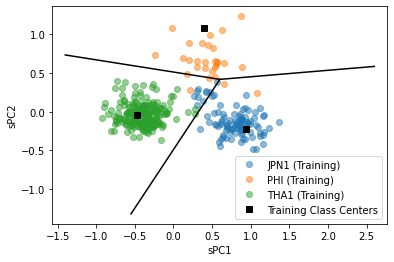

In [10]:
_ = plsda.visualize(styles=['hard'])

In [11]:
# We can see what samples are predicted to be using the predict() function.
pred = plsda.predict(raw_x)

In [12]:
plsda.score(raw_x, raw_y)

0.9565217391304348

In [13]:
# The score() function is just tetsing how many are correctly predicted.  You can do this directly and 
# easily with the "hard" version of PLS-DA.
np.sum(np.array(pred).ravel() == raw_y) / raw_y.shape[0]

0.9565217391304348

In [14]:
# More complete figures of merit can be computed.
df, I, CSNS, CSPS, CEFF, TSNS, TSPS, TEFF = plsda.figures_of_merit(pred, raw_y)

In [15]:
df # Each row is what the sample IS, each column is what the PREDICTION is.

,JPN1,PHI,THA1,UNKNOWN
JPN1,87,0,10,0
PHI,2,24,3,0
THA1,0,0,219,0


In [16]:
I # Total fo each category

JPN1     97
PHI      29
THA1    219
dtype: int64

In [17]:
CSNS

JPN1    0.896907
PHI     0.827586
THA1    1.000000
dtype: float64

In [18]:
CSPS

JPN1    0.991935
PHI     1.000000
THA1    0.896825
dtype: float64

In [19]:
CEFF

JPN1    0.943225
PHI     0.909718
THA1    0.947009
dtype: float64

In [20]:
TSNS, TSPS, TEFF

(0.9565217391304348, 0.9565217391304348, 0.9565217391304348)

## Training a Soft Model

In [21]:
# Here the data are elemental levels so we will scale the X data
plsda = PLSDA(n_components=5, 
              alpha=0.05, 
              gamma=0.01, 
              not_assigned='UNKNOWN', 
              style="soft", 
              scale_x=True)

In [22]:
_ = plsda.fit(raw_x, raw_y)

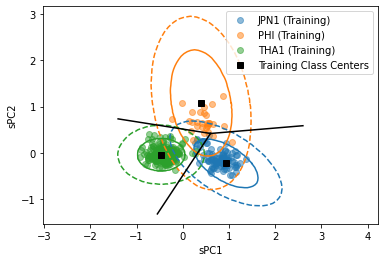

In [23]:
# You can visualize both the hard and soft boundaries if you train a soft model.
# With a hard model, you only get the hard boundaries by default.
_ = plsda.visualize(styles=['hard', 'soft'])

In [24]:
# We can see what samples are predicted to be using the predict() function.
pred = plsda.predict(raw_x)

In [25]:
# Samples can now be predicted to belong to multiple classes.
pred[:10]

[['PHI'],
 ['JPN1', 'PHI'],
 ['PHI', 'JPN1'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['PHI'],
 ['PHI'],
 ['PHI', 'JPN1'],
 ['PHI', 'JPN1'],
 ['PHI']]

In [26]:
# More complete figures of merit can be computed.
df, I, CSNS, CSPS, CEFF, TSNS, TSPS, TEFF = plsda.figures_of_merit(pred, raw_y)

In [27]:
df

,JPN1,PHI,THA1,UNKNOWN
JPN1,91,17,0,2
PHI,0,27,0,2
THA1,2,2,203,13


## Testing

First, let's test on other pure samples that weren't in the training set.

In [28]:
if using_colab:
    loc = 'https://raw.githubusercontent.com/mahynski/chemometrics/master/tests/data/plsda3_test.csv'
else:
    loc = '../tests/data/plsda3_test.csv'
df = pd.read_csv(loc, header=None)

raw_x_t = np.array(df.values[:,3:], dtype=float)
raw_y_t = np.array(['THA2']*len(raw_x), dtype=str)

In [29]:
pred = plsda.predict(raw_x_t)
df, I, CSNS, CSPS, CEFF, TSNS, TSPS, TEFF = plsda.figures_of_merit(pred, raw_y_t)

In [30]:
df # Most foreign samples were CORRECTLY identified as being unknown

,JPN1,PHI,THA1,UNKNOWN
THA2,0,0,2,130


# Optimizing the Classifier

Here we took alpha as a meaningful choice of type I error rate, but it could also be adjusted.  Moreover, we arbitrarily selected the number of PCs to use in the PLSDA model.  We can use scikit-learn's pipelines to automatically optimize hyperparameters like this.

In [31]:
# Here I've use an imblearn pipeline, but you can also use scikit-learn's pipeline if you don't want to 
# do any class balancing.

pipeline = imblearn.pipeline.Pipeline(steps=[
    # Insert other preprocessing steps here...
    # ("smote", ScaledSMOTEENN(random_state=1)), # For example, class balancing
    ("plsda", PLSDA(n_components=5, 
                    alpha=0.05,
                    scale_x=True, 
                    not_assigned='UNKNOWN',
                    style='soft', 
                   )
    )
])

# Hyperparameters of pipeline steps are given in standard notation: step__parameter_name
param_grid = [{
    # 'smote__k_enn':[1, 2, 3],
    # 'smote__k_smote':[1, 3, 3],
    # 'smote__kind_sel_enn':['all', 'mode'],
    'plsda__n_components':np.arange(1, 20, 2),
    'plsda__alpha': [0.07, 0.05, 0.03, 0.01],
    #'plsda__scale_x':[True, False],
    #'plsda__style':['hard', 'soft'],
}]

gs = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    cv=sklearn.model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=0),
    error_score=0,
    refit=True
)

_ = gs.fit(raw_x, raw_y)

In [32]:
# The best parameters found can be accessed like this:
gs.best_params_

{'plsda__alpha': 0.01, 'plsda__n_components': 17}

In [33]:
gs.best_score_ # The best score it recieved was...

0.9446813969750131

In [34]:
# You can see detailed CV results here
gs.cv_results_

{'mean_fit_time': array([0.01907825, 0.02959124, 0.01812299, 0.02075656, 0.02966277,
        0.03913267, 0.05752953, 0.03577447, 0.05177927, 0.04978951,
        0.0190204 , 0.01095517, 0.02374617, 0.03791324, 0.03435127,
        0.03743323, 0.05163781, 0.05559174, 0.04229442, 0.05013323,
        0.01677783, 0.01840003, 0.02504778, 0.03421895, 0.04322704,
        0.01949159, 0.03802657, 0.07384427, 0.07024145, 0.06120451,
        0.01641726, 0.02621365, 0.03689265, 0.0607601 , 0.04798325,
        0.05022391, 0.0456574 , 0.05729596, 0.06655796, 0.05362042]),
 'mean_score_time': array([0.04182108, 0.07799125, 0.06237753, 0.051989  , 0.05025204,
        0.05574997, 0.06823468, 0.05685155, 0.04819894, 0.04453007,
        0.07249006, 0.03921676, 0.06669545, 0.07300695, 0.05183085,
        0.06997347, 0.07724857, 0.06652188, 0.06630452, 0.05112982,
        0.05630334, 0.06093129, 0.05920601, 0.08985329, 0.05314604,
        0.04714839, 0.04381235, 0.10943818, 0.05653755, 0.0629886 ,
        0.

In [35]:
# For a 1D optimization you can easily visualize where the best value is:
# plt.errorbar(np.arange(1, 20, 2), gs.cv_results_['mean_test_score'], yerr=gs.cv_results_['std_test_score'])
# plt.xlabel('n_components')
# plt.ylabel('Mean Test Score (TEFF)')

In [36]:
# scikit-learn finds the optimum over the range, however, you may wish to simply look at these results
# and use a smaller value, perhaps at an "elbow", and re-train a new model separately.

In [37]:
# The refit=True (default) refits the model on the data in the end so you can use it directly.
gs.best_estimator_.predict(raw_x)

[['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['PHI', 'JPN1'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['PHI', 'JPN1'],
 ['JPN1'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1', 'PHI'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['PHI'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1', 'PHI'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1', 'PHI

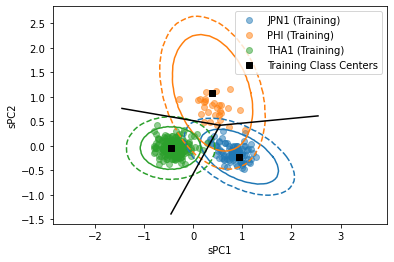

In [38]:
# You can visualize the training results
gs.best_estimator_.named_steps['plsda'].visualize(styles=['hard', 'soft'])

In [39]:
# Train 
gs.best_estimator_.named_steps['plsda'].score(raw_x, raw_y) # The score being used here is TEFF

0.9485836621422361

In [40]:
pred = gs.best_estimator_.named_steps['plsda'].predict(raw_x)
df, I, CSNS, CSPS, CEFF, TSNS, TSPS, TEFF = plsda.figures_of_merit(pred, raw_y)

In [41]:
pred[:20]

[['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['PHI', 'JPN1'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['PHI', 'JPN1'],
 ['JPN1'],
 ['JPN1', 'PHI'],
 ['JPN1', 'PHI'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1'],
 ['JPN1']]

In [42]:
df

,JPN1,PHI,THA1,UNKNOWN
JPN1,96,26,0,0
PHI,0,29,0,0
THA1,2,2,215,1


In [43]:
CSNS

JPN1    0.989691
PHI     1.000000
THA1    0.981735
dtype: float64

In [44]:
CSPS

JPN1    0.991935
PHI     0.911392
THA1    1.000000
dtype: float64

In [45]:
CEFF

JPN1    0.990812
PHI     0.954669
THA1    0.990825
dtype: float64

In [46]:
TSPS, TSNS, TEFF

(0.9130434782608696, 0.9855072463768116, 0.9485836621422361)

In [47]:
np.any(gs.best_estimator_.named_steps['plsda'].check_outliers())

False

In [48]:
# Test
gs.best_estimator_.named_steps['plsda'].score(raw_x_t, raw_y_t) # The score being used here is TEFF

0.9884057971014493

In [49]:
pred = gs.best_estimator_.named_steps['plsda'].predict(raw_x_t)
df, I, CSNS, CSPS, CEFF, TSNS, TSPS, TEFF = plsda.figures_of_merit(pred, raw_y_t)

In [50]:
pred[:20]

[['UNKNOWN'],
 ['UNKNOWN'],
 ['THA1'],
 ['THA1'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN'],
 ['UNKNOWN']]

In [51]:
df

,JPN1,PHI,THA1,UNKNOWN
THA2,0,0,4,128
